# 의사결정트리
* 분류, 회귀 모두 가능

* 스무고개 하듯 예/아니오 질문을 이어가며 학습하는 알고리즘

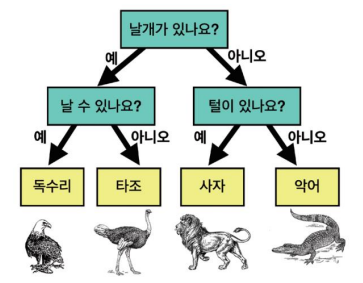

### SVM과 다른 점

SVM은 공간 내에서 자유롭게 분류모델을 선택할 수 있음.

그러나 결정 트리는 특성을 기준으로 데이터를 양분하는 것.

가능한 얕은 단계에서 데이터가 분리될 수 있도록 하는 경우가 좋다.

너무 깊으면 시간이 오래 걸리고, 과적합이 될 가능성이 높아지기 때문이다.



엔트로피

정보량을 측정하기 위해 고안된 것, 값이 크면 많은 정보가 담겨있다는 의미

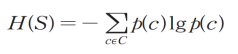

정보 이득

데이터를 나누었을 때 줄어든 엔트로피

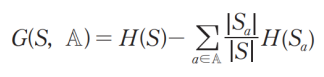

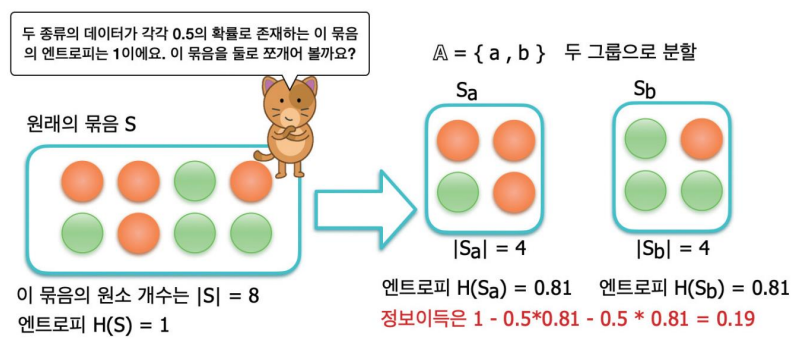

지니 불순도

불순도를 계산하는 척도

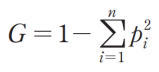

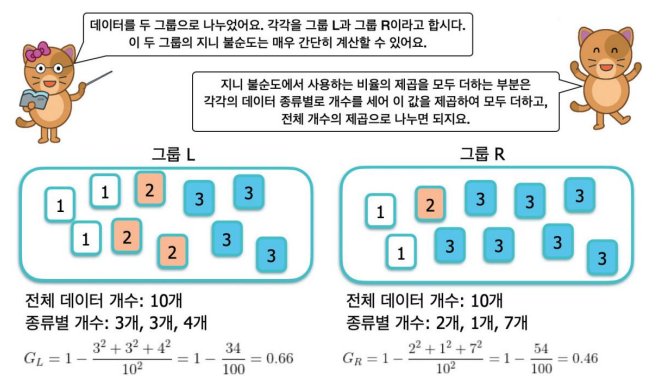

In [ ]:
from sklearn.datasets import load_iris

raw_iris=load_iris()
X=raw_iris.data
y=raw_iris.target


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree=DecisionTreeClassifier(max_depth=3) #깊이 최대 3으로 제한
dec_tree.fit(X,y)

DecisionTreeClassifier(max_depth=3)

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
    dec_tree,
    out_file=("./dec_tree_for_iris.dot"),
    feature_names=raw_iris.feature_names,
) #decision tree 그림 추출

!dir

dec_tree_for_iris.dot  sample_data


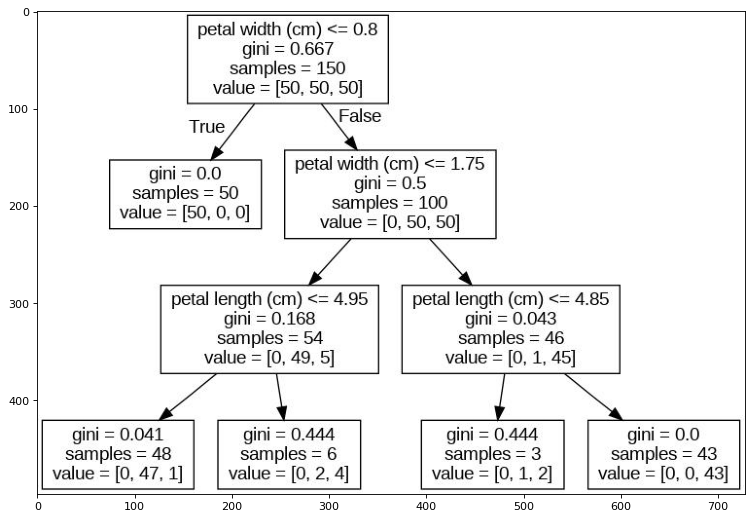

In [ ]:
!dot -Tjpg dec_tree_for_iris.dot -o dec_tree_for_iris.jpg #dot파일을 jpg 파일로 변환

import matplotlib.pyplot as plt
dec_tree_img=plt.imread('./dec_tree_for_iris.jpg')
plt.figure(figsize=(12,8),dpi=80,facecolor='w',edgecolor='k')
plt.imshow(dec_tree_img)

#차원의 저주
### 차원이란?

각 데이터를 표현하는 특징의 종류

차원이 높아질수록 데이터를 표현하는 공간이 급격히 늘어난다.

그러므로 차원축소가 필요하다.

특징선택 또한 가장 단순한 차원 축소이다.

##차원축소
새로운 축을 도입하고, 이 축 위로 데이터를 투영하면 분산을 더 잘 유지할 수 있음.

데이터의 분산을 가장 잘 유지하는 축들을 주성분이라고 한다.

이러한 방식을 주성분 분석(PCA)라고 한다.


In [ ]:
import numpy as np
import pandas as pd

iris=load_iris()
df=pd.DataFrame(data=np.c_[iris['data'],iris['target']], #c_는 concat과 똑같다.
                columns=iris['feature_names']+['target'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
from sklearn.preprocessing import StandardScaler
features=iris['feature_names']
x=df.loc[:,features].values
y=df.loc[:,['target']].values
x=StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_result=pca.fit_transform(x)
principalDF=pd.DataFrame(data=pca_result,columns=['PC1','PC2'])

In [ ]:
finalDF=pd.concat([principalDF,df[['target']]],axis=1)
finalDF

,PC1,PC2,target
0,-2.264703,0.480027,0.0
1,-2.080961,-0.674134,0.0
2,-2.364229,-0.341908,0.0
3,-2.299384,-0.597395,0.0
4,-2.389842,0.646835,0.0
...,...,...,...
145,1.870503,0.386966,2.0
146,1.564580,-0.896687,2.0
147,1.521170,0.269069,2.0
148,1.372788,1.011254,2.0


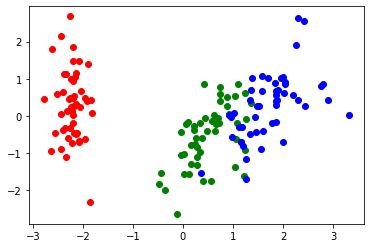

In [ ]:
targets=[0.0,1.0,2.0]
colors=['r','g','b']
for target, color in zip(targets,colors):
  idx=finalDF['target']==target
  plt.scatter(finalDF.loc[idx,'PC1'],finalDF.loc[idx,'PC2'],c=color)

In [18]:
# 차원축소한 결과를 가지고 SVM을 이용하여 분류하기

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

X=finalDF[['PC1','PC2']].to_numpy()
y=finalDF['target']
X_tr,X_te,y_tr,y_te=train_test_split(X,y,train_size=0.7)
svm=Pipeline([('scaler',StandardScaler()),('linearSVC',LinearSVC(C=1,loss='hinge'))])

svm.fit(X_tr,y_tr)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linearSVC', LinearSVC(C=1, loss='hinge'))])

In [23]:
prediction=svm.predict(X_te)
svm.score(X_te,y_te)

0.8888888888888888

#앙상블
여러 개의 알고리즘들이 하나의 값을 예측하는 기법을 통칭하여 말함

시간이 굉장히 오래 걸리지만 비교적 좋은 성능을 냄

하나의 데이터를 넣음 -> 여러 모델을 학습 -> 테스트 데이터 입력 -> 투표 또는 가중치 기법을 적용하여 최종 선택



투표 분류기 : 여러개의 모델을 만들어 결과를 취합하여 가장 많이 선택된 결과를 취함
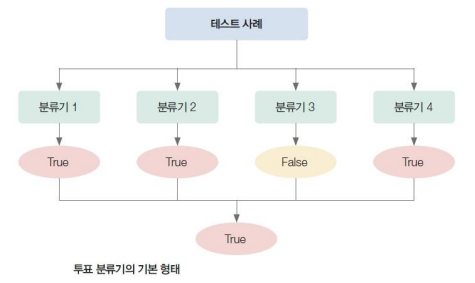

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

X=np.load("titanic_X_train.npy")
y=np.load("titanic_y_train.npy")

In [27]:
clf1=LogisticRegression(random_state=1)
clf2=DecisionTreeClassifier(random_state=1,max_depth=4)

eclf=VotingClassifier(
    estimators=[('lr',clf1),('rf',clf2)],voting='hard'
)#앙상블 모델 구현

In [29]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(eclf,X,y,cv=5).mean())#교차 검증 + 앙상블 모델의 평균 정확도를 출력
print(cross_val_score(clf1,X,y,cv=5).mean())#교차 검증 + 로지스틱회귀 모델 평균 정확도 출력
print(cross_val_score(clf2,X,y,cv=5).mean())#교차 검증 + 의사결정트리 모델 평균 정확도 출력

0.8301783787215135
0.8290420872214816
0.8223068621849807


## grid search
최적의 파라미터를 찾아내기 위한 툴

In [32]:
c_params=[0.1,5.0,7.0,10.0,15.0,20.0,100.0]

params={ #그리드 서치를 하려는 파라미터 값
    "lr__solver":['liblinear'],
    "lr__penalty":["l2"],
    "lr__C":c_params,
    "rf__criterion":["gini","entropy"],
    "rf__max_depth":[10,8,7,6,5,4,3,2],
    "rf__min_samples_leaf":[1,2,3,4,5,6,7,8,9]
}

In [33]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=eclf,param_grid=params,cv=5)
grid=grid.fit(X,y)
grid.best_score_

0.8425569732749316

In [34]:
#최적의 파라미터
grid.best_params_

{'lr__C': 5.0,
 'lr__penalty': 'l2',
 'lr__solver': 'liblinear',
 'rf__criterion': 'gini',
 'rf__max_depth': 10,
 'rf__min_samples_leaf': 5}

## 배깅과 랜덤 포레스트
### 1. 배깅
 하나의 데이터셋에서 샘플링을 통해 여러 개의 데이터셋을 만든 다음 각 데이터셋마다 모델을 개발하여 투표 분류기로 만드는 방법

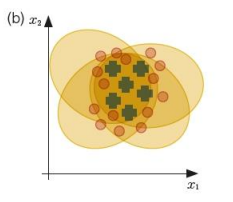

샘플링: 전체 모수 중 일부분을 뽑아서 데이터를 추출

### 2. 부트스트래핑
 복원추출하는 여러 번의 과정

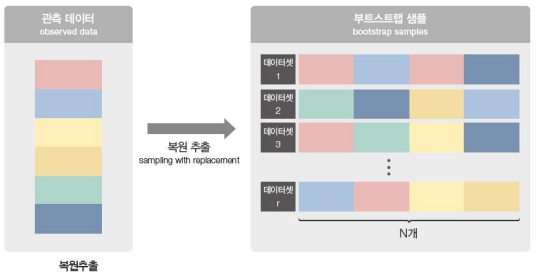

* out-of-bag(OOB) Error

추출한 데이터 이외의 데이터를 이용하여 예측한 결과 잘못 예측한 것

### 3. 랜덤 포레스트

하나의 모델을 나무라고 한다면 이러한 나무들을 이용햏 랜덤하게 데이터를 뽑아서 숲을 생성하는 알고리즘

(배깅알고리즘 + 의사결정트리)


In [36]:
#로지스틱 회귀와 배깅의 결합
from sklearn.ensemble import BaggingClassifier

X=np.load("titanic_X_train.npy")
y=np.load("titanic_y_train.npy")
clf1=LogisticRegression(random_state=1)
eclf=BaggingClassifier(clf1,oob_score=True)

cross_val_score(eclf,X,y,cv=5).mean()

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too 

0.823411413698978

In [37]:
params={
    "n_estimators":[10,20,30,40,50,55],
    "max_samples":[0.5,0.6,0.7,0.8,0.9,1]
}

grid=GridSearchCV(estimator=eclf,param_grid=params,cv=5)
grid=grid.fit(X,y)


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too 

In [39]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_.oob_score)

0.8301656827270996
{'max_samples': 0.9, 'n_estimators': 55}
True


In [40]:
#랜덤포래스트를 이용
import numpy as np
from sklearn.ensemble import RandomForestClassifier
X = np.load("titanic_X_train.npy")
y = np.load("titanic_y_train.npy")
eclf = RandomForestClassifier(n_estimators=100,max_features=2, n_jobs=7,
                              oob_score=True)
from sklearn.model_selection import cross_val_score
cross_val_score(eclf, X, y, cv=5).mean()


0.7941852345584968

In [41]:
#랜덤포래스트를 그리드 서치를 통해 돌림
params={
    "n_estimators":[10,20,30,50,100],
    "max_features":[1,2,3,4,5,6,7,10,15,20,25,len(x[0])]
}
grid=GridSearchCV(estimator=eclf,param_grid=params,cv=5)
grid=grid.fit(X,y)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

In [42]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_.oob_score)

0.8245540531962167
{'max_features': 25, 'n_estimators': 30}
True


## 엑스트라 트리
* 랜덤포레스트와 비슷하게 동작

* 랜덤포레스트는 부트스트랩 샘플을 사용하지만 엑스트라 트리는 전체 샘플을 사용한다. 대신 노드를 분할 할 때 좋은 분할을 찾는 것이 아니라 무작위로 분할한다.

* 하나의 결정트리를 무작위 분할하면 성능이 낮아지지만 많은 트리를 앙상블하므로 과대적합을 막고 검증세트의 점수를 높이는 효과가 있다.

#교차검증
훈련데이터가 너무 적다!

훈련세트를 여러조각으로 나누어 한 부분씩을 검증세트로 활용하여 여러번 평가한다.

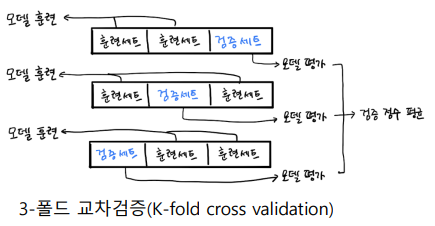

k조각으로 나눔

train_test_split()는 자동으로 실행되기 때문에 할 필요가 없었지만 cross_validiate()는 훈련 세트를 섞어야 함.

GridSearchCV : 하이퍼파라미터 탐색과 교차검증을 동시에 수행

n_jobs : cpu를 얼마나 많이 사용할지

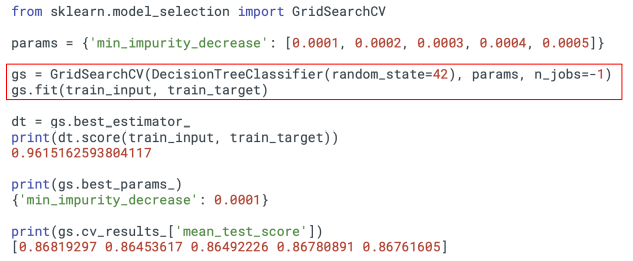

# 부스팅
학습 라운드를 차례로 진행하면서 각 예측이 틀린 데이터에 점점 가중치를 주는 방식
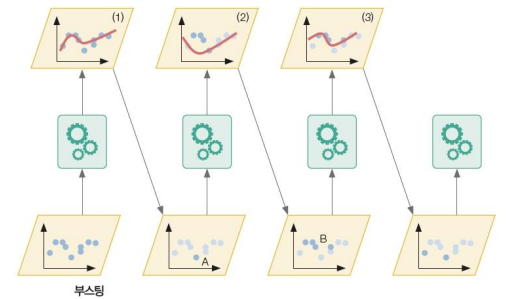



## 에이다부스트
* 부스팅 알고리즘 중 대표적인 알고리즘

* 매 라운드마다 개별 데이터의 가중치를 계산하는 방식

* 각각의 판별기에서 판별하는 기준은 깊이가 2인 의사결정트리이다.


In [44]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
eclf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), #판별기준을 의사결정트리로 적용
                          n_estimators=500)

from sklearn.model_selection import cross_val_score
cross_val_score(eclf, X, y, cv=5).mean()

0.7908144480416428

In [45]:
from sklearn.ensemble import RandomForestClassifier
eclf = RandomForestClassifier(n_estimators=500)
cross_val_score(eclf, X, y, cv=5).mean()

0.8009395035866185

In [46]:
eclf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=500)
params = {"base_estimator__criterion" : ["gini", "entropy"],
"base_estimator__max_features" : [7,8,],
"base_estimator__max_depth" : [1,2],
"n_estimators": [23,24, 25, 26, 27],
"learning_rate": [0.4, 0.45, 0.5, 0.55, 0.6]
}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5, n_jobs=7)
grid = grid.fit(X, y)
grid.best_score_


0.8301847267187202

In [47]:
grid.best_params_

{'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 2,
 'base_estimator__max_features': 8,
 'learning_rate': 0.5,
 'n_estimators': 25}

In [48]:
grid.best_estimator_.feature_importances_ #피쳐의 중요도를 알려줌

array([0.12606306, 0.15549068, 0.0601613 , 0.08234992, 0.06736923,
       0.06729355, 0.04188141, 0.01821938, 0.01035428, 0.00239032,
       0.02509572, 0.        , 0.        , 0.0229109 , 0.01378258,
       0.04349525, 0.01899687, 0.01972511, 0.00519015, 0.02324272,
       0.03915808, 0.01969798, 0.07129985, 0.04207747, 0.        ,
       0.        , 0.02375419])